<a href="https://colab.research.google.com/github/Aandhikads/Aandhikads/blob/main/Data_Mining_Tanahlongsor_jawabarat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Load Data From Local File
data=pd.read_csv('bpbd-od_17606_jml_kejadian_bencana_tanah_longsor__kabupatenkota_data.csv')

In [8]:
#See the first five data 
data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_tanah_longsor,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,KEJADIAN,2012
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,48,KEJADIAN,2012
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,9,KEJADIAN,2012
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,12,KEJADIAN,2012
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,36,KEJADIAN,2012


In [9]:
# see the number of row and number of columns of data
data.shape

(270, 8)

In [10]:
#Understanding each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    270 non-null    int64 
 1   kode_provinsi         270 non-null    int64 
 2   nama_provinsi         270 non-null    object
 3   kode_kabupaten_kota   270 non-null    int64 
 4   nama_kabupaten_kota   270 non-null    object
 5   jumlah_tanah_longsor  270 non-null    int64 
 6   satuan                270 non-null    object
 7   tahun                 270 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 17.0+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


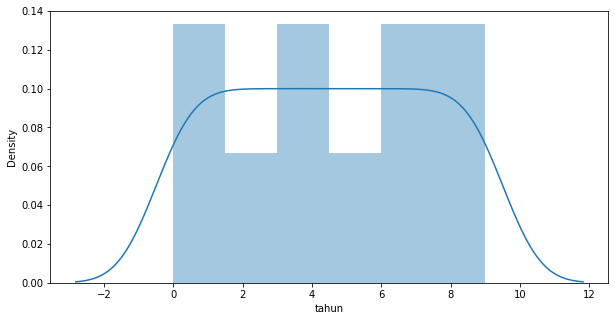

In [31]:
#look at the distribution of the totalchanges variable with boxplot
plt.figure(figsize=(10,5))
sns.distplot(data["tahun"])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


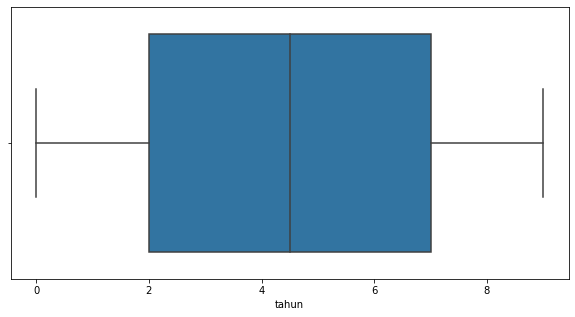

In [32]:
#with boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data["tahun"])
plt.show()

In [34]:
#See Observation outliners onn the totalcharges variable
Q1=data["tahun"].quantile(0.25)
Q3=data["tahun"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 *IQR)
data.loc[(data["tahun"]>upper_range),:]

,id,kode_provinsi,kode_kabupaten_kota,jumlah_tanah_longsor,tahun


In [36]:
#Replace outliner observations with upper bound and lower bound
data.loc[(data["tahun"]>upper_range), "tahun"]=upper_range

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


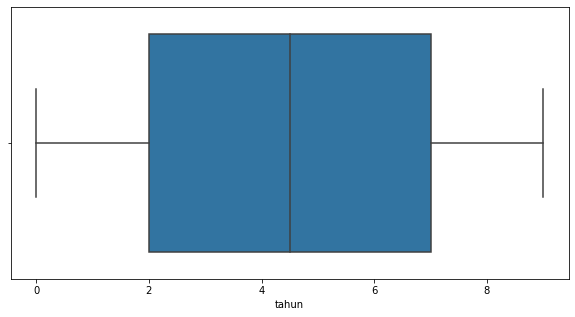

In [38]:
#check outlier on the totalcharges variable
plt.figure(figsize=(10,5))
sns.boxplot(data["tahun"])
plt.show()

In [11]:
 data=data.drop(labels="nama_provinsi",axis=1)
data=data.drop(labels="nama_kabupaten_kota",axis=1)
data=data.drop(labels="satuan",axis=1)

In [12]:
#see a statistical summary of variables with numeric types
data.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_tanah_longsor,tahun
count,270.000000,270.0,270.000000,270.000000,270.000000
mean,135.500000,32.0,3231.333333,20.970370,2016.500000
std,78.086491,0.0,31.259794,37.892126,2.877615
min,1.000000,32.0,3201.000000,0.000000,2012.000000
25%,68.250000,32.0,3207.000000,1.000000,2014.000000
50%,135.500000,32.0,3214.000000,6.000000,2016.500000
75%,202.750000,32.0,3273.000000,27.000000,2019.000000
max,270.000000,32.0,3279.000000,354.000000,2021.000000


In [13]:
#Drop duplicate value
data=data.drop_duplicates()

In [14]:
#see changes in the number of rows and columns after the duplicate drop
data.shape

(270, 5)

In [15]:
#Check data type
data.dtypes

id                      int64
kode_provinsi           int64
kode_kabupaten_kota     int64
jumlah_tanah_longsor    int64
tahun                   int64
dtype: object

In [16]:
#Check the missing value
data.isnull().sum()

id                      0
kode_provinsi           0
kode_kabupaten_kota     0
jumlah_tanah_longsor    0
tahun                   0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

Id_col = ['id']
num_cols = ['nama_provinsi','nama_kabupaten_kota','satuan']

bin_cols = ['kode_provinsi','kode_kabupaten_kota','jumlah_tanah_longsor','tahun']

le = LabelEncoder()
for i in bin_cols :
  data[i] = le.fit_transform(data[i])

In [18]:
data

,id,kode_provinsi,kode_kabupaten_kota,jumlah_tanah_longsor,tahun
0,1,0,0,0,0
1,2,0,1,43,0
2,3,0,2,9,0
3,4,0,3,12,0
4,5,0,4,34,0
...,...,...,...,...,...
265,266,0,22,2,9
266,267,0,23,2,9
267,268,0,24,3,9
268,269,0,25,2,9


DATA PARTITION


In [19]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size=0.20,random_state=111)

train_X = train.drop(labels='tahun',axis=1)
train_Y = train['tahun']
test_X  = test.drop(labels='tahun',axis=1)
test_Y  = test['tahun']
     

In [20]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote methode
os = SMOTE(sampling_strategy='minority', random_state = 123,k_neighbors=5)
train_smote_X, train_smote_Y = os.fit_resample(train_X, train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X, columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [21]:
#Propotion before smote
train_Y.value_counts()

3    24
8    24
9    23
7    23
4    22
2    21
6    20
1    20
5    20
0    19
Name: tahun, dtype: int64

In [22]:
train_smote_Y.value_counts()

tahun
0        24
3        24
8        24
7        23
9        23
4        22
2        21
1        20
5        20
6        20
dtype: int64

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(train_smote_X, train_smote_Y)

<ipython-input-24-3cc9b4b78856>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_smote_X, train_smote_Y)


RandomForestClassifier(random_state=0)

In [25]:
y_pred = model.predict(test_X)

In [26]:
print(classification_report(test_Y, y_pred))

score = accuracy_score(test_Y, y_pred)
print("Accuracy: %.2f%%" % (score*100))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         4

    accuracy                           0.98        54
   macro avg       0.99      0.99      0.99        54
weighted avg       0.98      0.98      0.98        54

Accuracy: 98.15%


In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=10)
clf = RandomForestClassifier()
score_rf_val = cross_val_score(clf,train_smote_X, train_smote_Y,cv=cv)
score_rf_val

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

array([1.        , 0.95454545, 0.95454545, 1.        , 0.95454545,
       0.90909091, 0.95454545, 1.        , 1.        , 0.95454545])

In [28]:
score_rf_val.mean()
print("Accuracy Validation Score: %.2f%%" % (score_rf_val.mean()*100))

Accuracy Validation Score: 96.82%


In [29]:
confusion_matrix(test_Y, y_pred)

array([[7, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4]])

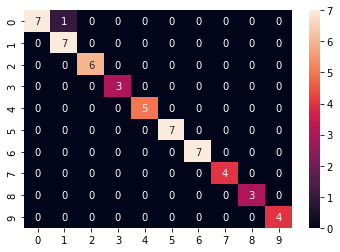

In [30]:
import seaborn as sn
cm = confusion_matrix(test_Y, y_pred)
sn.heatmap(cm, annot=True)